In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from warnings import simplefilter
from sklearn.datasets import make_classification
from IPython.display import display
from imblearn.over_sampling import SMOTE

simplefilter(action='ignore', category=FutureWarning)

In [2]:
"""
# Import the dataset
dataset = pd.read_csv("parkinsons.data", sep=',')
dataset.head(10)
"""

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
dataset = pd.read_csv(url)
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
dataset.drop(['name'], axis=1, inplace=True)
dataset['status'] = dataset['status'].astype('uint8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [4]:
def print_accuracies(approach, a1, a2, a3, a4, a5):
  print("Approach ",approach)
  print("Accuracy of Logistic Regression: ", a1)
  print("Accuracy of Random FOrest Classifier: ", a2)
  print("Accuracy of Support Vector Machine: ", a3)
  print("Accuracy of K-Nearest Neighbors: ", a4)
  print("Accuracy of Naive Bayes Classifier: ", a5)


Approach 1

In [5]:
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

# Normalizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Splitting the Dataset into train and test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_ypred = lr_model.predict(X_test)
lr_acc1 = accuracy_score(Y_test, lr_ypred)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_ypred = rf_model.predict(X_test)
rf_acc1 = accuracy_score(Y_test, rf_ypred)

clf = svm.SVC(kernel = 'linear', probability=True)
clf.fit(X_train, Y_train)
svm_ypred = clf.predict(X_test)
svm_acc1 = accuracy_score(Y_test, svm_ypred)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_ypred = knn.predict(X_test)
knn_acc1 = accuracy_score(Y_test, knn_ypred)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_ypred = nb_model.predict(X_test)
nb_acc1 = accuracy_score(Y_test, nb_ypred)

In [8]:
print_accuracies(1, lr_acc1, rf_acc1, svm_acc1, knn_acc1, nb_acc1)

Approach  1
Accuracy of Logistic Regression:  0.8979591836734694
Accuracy of Random FOrest Classifier:  0.9183673469387755
Accuracy of Support Vector Machine:  0.8979591836734694
Accuracy of K-Nearest Neighbors:  0.9387755102040817
Accuracy of Naive Bayes Classifier:  0.7551020408163265


Approach 2

In [9]:
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

print("Before the Balancing : ")
print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)

Before the Balancing : 
Shape of X :  (195, 22)
Shape of Y :  (195,)


In [10]:
# Normalizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to the training data
pca = PCA(n_components=5)
X = pca.fit_transform(X_scaled)

In [11]:
print("After the Balancing : ")
print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)

After the Balancing : 
Shape of X :  (195, 5)
Shape of Y :  (195,)


In [12]:
# Splitting the Dataset into train and test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_ypred = lr_model.predict(X_test)
lr_acc2 = accuracy_score(Y_test, lr_ypred)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_ypred = rf_model.predict(X_test)
rf_acc2 = accuracy_score(Y_test, rf_ypred)

clf = svm.SVC(kernel = 'linear', probability=True)
clf.fit(X_train, Y_train)
svm_ypred = clf.predict(X_test)
svm_acc2 = accuracy_score(Y_test, svm_ypred)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_ypred = knn.predict(X_test)
knn_acc2 = accuracy_score(Y_test, knn_ypred)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_ypred = nb_model.predict(X_test)
nb_acc2 = accuracy_score(Y_test, nb_ypred)

In [14]:
print_accuracies(2, lr_acc2, rf_acc2, svm_acc2, knn_acc2, nb_acc2)

Approach  2
Accuracy of Logistic Regression:  0.8979591836734694
Accuracy of Random FOrest Classifier:  0.8775510204081632
Accuracy of Support Vector Machine:  0.9183673469387755
Accuracy of K-Nearest Neighbors:  0.9387755102040817
Accuracy of Naive Bayes Classifier:  0.8571428571428571


Approach 3

In [15]:
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

In [16]:
smote = SMOTE(random_state=2)
X, Y = smote.fit_resample(X, Y.ravel())
Data_Y = pd.DataFrame(Y, columns=["status"])

In [17]:
print("Before OverSampling :")
print(dataset['status'].value_counts(), end='\n\n')
print("After OverSampling :")
print(Data_Y['status'].value_counts(), end='\n\n')

Before OverSampling :
status
1    147
0     48
Name: count, dtype: int64

After OverSampling :
status
1    147
0    147
Name: count, dtype: int64



In [18]:
# Normalizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Splitting the Dataset into train and test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_ypred = lr_model.predict(X_test)
lr_acc3 = accuracy_score(Y_test, lr_ypred)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_ypred = rf_model.predict(X_test)
rf_acc3 = accuracy_score(Y_test, rf_ypred)

clf = svm.SVC(kernel = 'linear', probability=True)
clf.fit(X_train, Y_train)
svm_ypred = clf.predict(X_test)
svm_acc3 = accuracy_score(Y_test, svm_ypred)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_ypred = knn.predict(X_test)
knn_acc3 = accuracy_score(Y_test, knn_ypred)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_ypred = nb_model.predict(X_test)
nb_acc3 = accuracy_score(Y_test, nb_ypred)

In [21]:
print_accuracies(3, lr_acc3, rf_acc3, svm_acc3, knn_acc3, nb_acc3)

Approach  3
Accuracy of Logistic Regression:  0.8378378378378378
Accuracy of Random FOrest Classifier:  0.9864864864864865
Accuracy of Support Vector Machine:  0.8783783783783784
Accuracy of K-Nearest Neighbors:  0.9459459459459459
Accuracy of Naive Bayes Classifier:  0.7702702702702703


Bar Graph

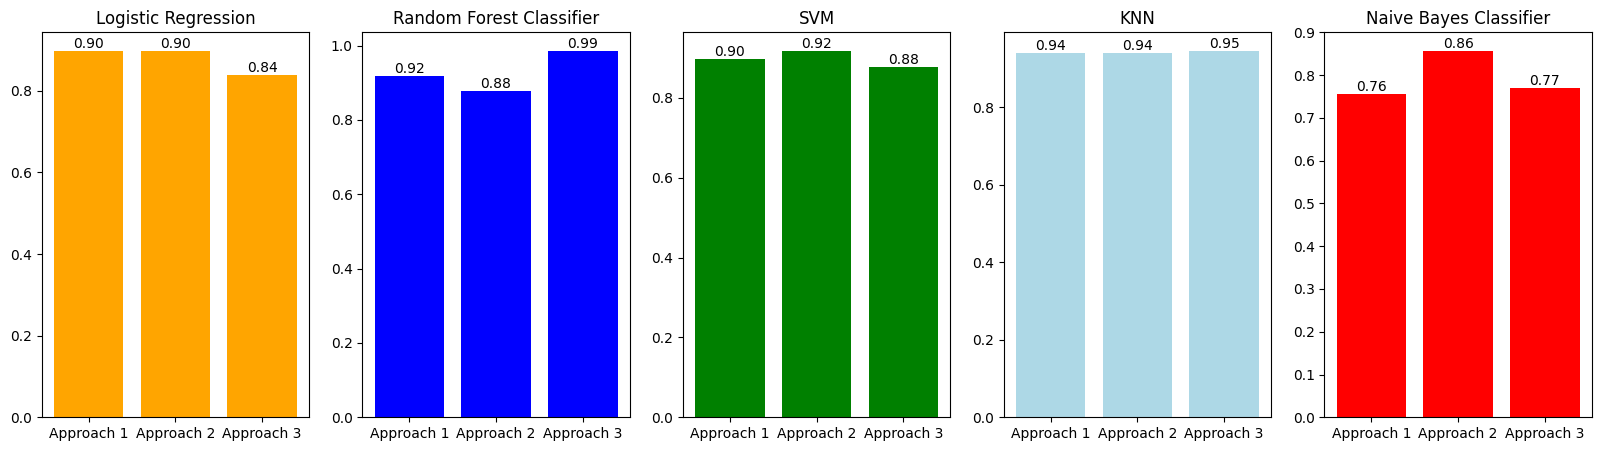

In [32]:
approaches = ['Approach 1', 'Approach 2', 'Approach 3']
models = ['Logistic Regression', 'Random Forest Classifier', 'SVM', 'KNN', 'Naive Bayes Classifier']
lr_accs = [lr_acc1, lr_acc2, lr_acc3]
rf_accs = [rf_acc1, rf_acc2, rf_acc3]
svm_accs = [svm_acc1, svm_acc2, svm_acc3]
knn_accs = [knn_acc1, knn_acc2, knn_acc3]
nb_accs = [nb_acc1, nb_acc2, nb_acc3]

accuracies = [
    lr_accs, rf_accs, svm_accs, knn_accs, nb_accs
]

colors = ['orange', 'blue', 'green', 'lightblue', 'red']
fig, axs = plt.subplots(1, 5, figsize = (20,5))

for i in range(5):
  axs[i].bar(approaches, accuracies[i], color=colors[i])
  axs[i].set_title(models[i])
  for j in range(len(approaches)):
    axs[i].text(x=j, y=accuracies[i][j], s=f"{accuracies[i][j]:.2f}", ha="center", va="bottom")

plt.grid(False)
plt.show()